# In-Class Assignment 13 - Evan Callaghan

### Consider the following linear model: y = 3.2 + 1.87x 

### 1. Interpret the slope of the line.
#### The estimated slope is 1.87. Therefore, for every one unit of increase in X, on average, Y will increase by 1.87.

### 2. The coefficient of determination of the above model is 89%. Interpret it.
#### 89% of the variability in Y can be explained by a linear model in which X is the predictor variable.

### 3. Using the model, estimate the value of y when x = 3.2.
#### Y = 3.2 + 1.87 (3.2) = 9.184


In [36]:
## 4. a) Using pandas to read the csv file and create a data-frame called batting

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
pd.set_option('display.max_rows', None, 'display.max_columns', None)

batting = pd.read_csv('batting.csv')
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [37]:
## b) Creating another data-frame called batting_agg that contains aggregated data at the player level. That is the 
## batting_agg should contain the total home-runs, total at bats, and total strikeouts.

batting_agg = batting.groupby(['playerID'])[['HR', 'AB', 'SO']].sum()
batting_agg.head()

,HR,AB,SO
playerID,,,
aardsda01,0,4,2.0
aaronha01,755,12364,1383.0
aaronto01,13,944,145.0
aasedo01,0,5,3.0
abadan01,0,21,5.0


In [38]:
## c)  Selecting players with at least 5000 career at bats

batting_agg = batting_agg[batting_agg['AB'] >= 5000]
batting_agg.head()

,HR,AB,SO
playerID,,,
aaronha01,755,12364,1383.0
abreubo01,288,8480,1840.0
adamssp01,9,5557,223.0
adcocjo01,336,6606,1059.0
alfoned01,146,5385,617.0


In [39]:
## d) Computing the home-run rate as total home-runs divided by total at bats. Also computing the strikeout rate 
## as total strikeout divided by total at bats.

batting_agg['HR_rate'] = batting_agg['HR'] / batting_agg['AB']
batting_agg['SO_rate'] = batting_agg['SO'] / batting_agg['AB']
batting_agg.head()

,HR,AB,SO,HR_rate,SO_rate
playerID,,,,,
aaronha01,755,12364,1383.0,0.061064,0.111857
abreubo01,288,8480,1840.0,0.033962,0.216981
adamssp01,9,5557,223.0,0.001620,0.040130
adcocjo01,336,6606,1059.0,0.050863,0.160309
alfoned01,146,5385,617.0,0.027112,0.114578


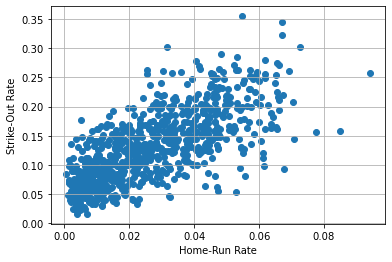

In [40]:
## e) Creating the scatter-plot between home-run rate and strikeout rate

plt.scatter('HR_rate', 'SO_rate', data = batting_agg)
plt.xlabel('Home-Run Rate')
plt.ylabel('Strike-Out Rate')
plt.grid()
plt.show()

## From the scatterplot, we can see that there is a positive linear relationship between home-run rate and strike-out rate.

In [41]:
## f) Building a linear regression model in which home-run rate is the predictor variable and
## strikeout rate is the target variable

## Building the model 
lm_md = smf.ols(formula = 'SO_rate ~ HR_rate', data = batting_agg).fit()

## Extracting model results
lm_md.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                SO_rate   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     872.6
Date:                Mon, 18 Oct 2021   Prob (F-statistic):          1.91e-130
Time:                        21:56:30   Log-Likelihood:                 1395.3
No. Observations:                 806   AIC:                            -2787.
Df Residuals:                     804   BIC:                            -2777.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0620      0.003     23.261      0.000       0.057       0.067
HR_rate        2.4907      0.084     29.540      0.000       2.325       2.656
==============================================================================
Omnibus:                       15.653   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.475
Skew:                           0.236   Prob(JB):                     5.90e-05
Kurtosis:                       3.598   Cond. No.                         55.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
## Using this model to predict the strikeout rate of a player with a home-run rate of 0.05.

new_data = pd.DataFrame({'HR_rate': [0.05]})

## Predicting on the new data
lm_md.predict(new_data)

## The estimated SO_rate for a HR_rate of 0.05 using the linear model is approximately 0.187.

0    0.186524
dtype: float64